<h2 style = 'text-align: center;'>Satellite Data Classification</h2>

<p>    For this project, we need several python libraries to process the data, and analyze the data. Supervised Machine Learning algorithms like SVM and knn are applied to the dataset. Several data processing libraries are used. For example:</p>
<ul>
    <li>dbfread (to access the data in the database)</li>
    <li>osgeo (to get the different band data in the satellite and CDL data)</li>
    <li>openCV, numpy, matplotlib and pandas(for general image and data analysis</li>

</ul>


In [1]:
import numpy as np
from dbfread import DBF
import matplotlib.pyplot as plt
%matplotlib inline                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                        

In [2]:
data = DBF('mydata.tif.vat.dbf')

In [3]:
cornData = []
for rows in data:
    cornData.append([rows['CLASS_NAME'], rows['RED'], rows['GREEN'],rows['BLUE'], rows['OPACITY']])

In [4]:
import cv2

In [5]:
cornData.insert(0, ['CLASSNAME', 'RED', 'GREEN', 'BLUE', 'ALPHA'])


In [6]:
import pandas as pd
cornDF = pd.DataFrame(cornData[1:], columns = cornData[0])
corn_np_array = np.array(cornData)


In [7]:
USDA_Map = cv2.imread('CDL_2013_Champaign_north.tif')
USDA_data = np.array(USDA_Map)

<p style = 'line-height: 7px;'> Then we have put all the color and class name data in the database to a pandas dataframe </p>
<p style = 'line-height: 7px;'> We have also created a numpy array to store the data above </p>
<p style = 'line-height: 7px; margin-bottom :30px;'> We have used openCV to read our CDL Image file, we have converted it to a numpy array <p>

<p> Then we use gdal to fetch our satellite data, and we can seperate its 5 bands into 5 big matrices. I have plotted the histograms of these 5 matrices. Observe that our every matrix has the same shape as our CDL labelling data. It is very easy for us to apply machine learning algorithms on those data</p>

In [2]:
from osgeo import gdal

In [4]:
gtif = gdal.Open('satellite.tif')
tif2 = gdal.Open('CDL_2013_Champaign_north.tif')

<p>gtif is our satellite data, which is our raw input data x. tif2 is our CDL data, which is our labelling data f(x)</p>
<p> Observe the our x and f(x) have the same shape and they represent the same region for every pixel. The histogram of each band of the satellite data is plotted below<p>



In [5]:
print(gtif.GetMetadata())
print(tif2.GetMetadata())
srcband = gtif.GetRasterBand(1)
count = gtif.RasterCount
count2 = tif2.RasterCount
print(count,count2)

asdfb = srcband.GetDataset()

band1 = srcband.ReadAsArray()
band2 = (gtif.GetRasterBand(2))
band2 = band2.ReadAsArray()
band3 = (gtif.GetRasterBand(3))
band3 = band3.ReadAsArray()
band4 = (gtif.GetRasterBand(4)).ReadAsArray()
band5 = (gtif.GetRasterBand(5)).ReadAsArray()

%matplotlib inline

count = 0
matrix1 = band1.flatten()
matrix2 = band2.flatten()
matrix3 = band3.flatten()
matrix4 = band4.flatten()
matrix5 = band5.flatten()
for i in enumerate([band1,band2,band3,band4,band5],1):
    print('the shape of the',i[0],'matrix is', i[1].shape)
    
for i in enumerate([band1,band2,band3,band4,band5],1):
    print('the max of the' ,i[0],' matrix is', np.max(i[1]))
    

{'AREA_OR_POINT': 'Area'}
{'AREA_OR_POINT': 'Area'}
5 1
the shape of the 1 matrix is (5959, 9425)
the shape of the 2 matrix is (5959, 9425)
the shape of the 3 matrix is (5959, 9425)
the shape of the 4 matrix is (5959, 9425)
the shape of the 5 matrix is (5959, 9425)
the max of the 1  matrix is 35709
the max of the 2  matrix is 35412
the max of the 3  matrix is 31680
the max of the 4  matrix is 24759
the max of the 5  matrix is 24381


<p></p>
<p></p>
<p>Since the data size is too large, we clear our memory after loading the raw data </p>

In [6]:
band1 = None
band2 = None
band3 = None
band4 = None
band5 = None
gtif1 = None
srcband = None

<p> We have plotted the histograms of our 5 bands below </p>

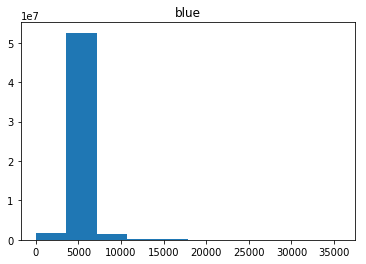

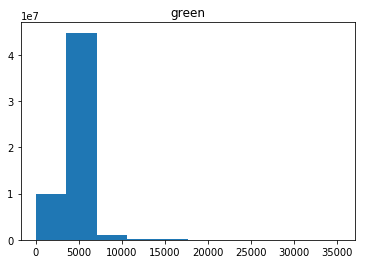

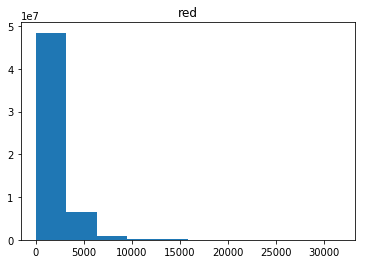

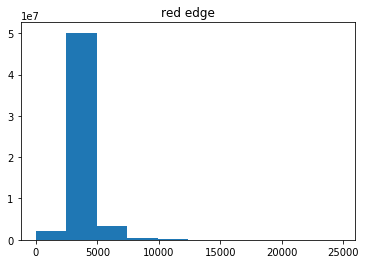

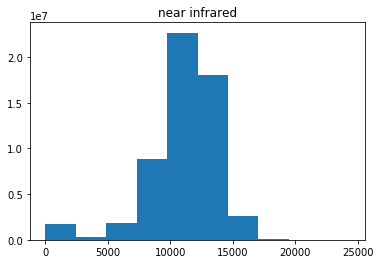

In [11]:
plt.hist(matrix1)
plt.title('blue')
plt.figure()
plt.hist(matrix2)
plt.title('green')
plt.figure()
plt.hist(matrix3)
plt.title('red')
plt.figure()
plt.hist(matrix4)
plt.title('red edge')
plt.figure()
plt.hist(matrix5)
plt.title('near infrared')
plt.figure()

<p> Then we need to obtain our dependent variable (label data) <p>

In [9]:
labels = tif2.GetRasterBand(1)
label_array = labels.ReadAsArray()
print('the shape of the CDL data is', label_array.shape)
# arr = labels.asarray()

the shape of the CDL data is (5959, 9425)


<p> We have obtained our labelling data, then we need to see how many different types of crops are in our labelling data. 1 represents the corn, 5 represents the soybeans, and 3 represents other types of crops. We have sorted our CDL data, we can see that corn appears the most in northern illinois and soybeans almost have the same level of production as corns</p>

In [14]:
label_dict = {}
for i in label_array.flatten():
    if i not in label_dict:
        label_dict[i] = 0
    else:
        label_dict[i] += 1
sorted_labels = sorted([(key,val) for key,val in label_dict.items()], key = lambda x: x[1], reverse = True)
print(sorted_labels)

[(1, 25320078), (5, 21417645), (176, 2522306), (121, 2325752), (122, 1977921), (141, 1287171), (123, 375667), (24, 347272), (111, 154703), (124, 124414), (190, 105600), (36, 80492), (37, 74591), (131, 23415), (26, 11530), (28, 5821), (43, 3318), (61, 2298), (152, 679), (195, 679), (58, 569), (241, 406), (59, 405), (222, 188), (225, 175), (13, 174), (27, 97), (4, 90), (12, 48), (254, 41)]


<p> For large classification problems, svm and knn algorithms are good choice. knn has good accuracy when the dimension is low and the number of data points is large. However, knn is more sensitive to outliers and it does not have good performance in high dimensional dataset</p>
<p> SVM is a stable algorithm. It is very good for high dimensional data, and it treats outliers pretty well. Even though it has lower accuracy than knn during cross validation, it is more preferred in our task </p>
<p> First, we use KNN algorithm to train our model. As a rule of thumb, we should choose the square root of our sample size as our k value. Then, we can use 5-fold or 10-fold cross validation for parameter tuning to find the best k for our knn model</p>
<p> The first step is to build our training data, in order to do it, we need to clean and normalizae our data </p>

In [7]:
matrix1 = matrix1/np.max(matrix1)
matrix2 = matrix2/np.max(matrix2)
matrix3 = matrix3/np.max(matrix3)
matrix4 = matrix4/np.max(matrix4)
matrix5 = matrix5/np.max(matrix5)


In [ ]:
#normalize input data
input_data_flatten = np.zeros((5929*9425,5))
for i in range(5929*9425):
    input_data_flatten[i,0] = matrix1[i]
    input_data_flatten[i,1] = matrix2[i]
    input_data_flatten[i,2] = matrix3[i]
    input_data_flatten[i,3] = matrix4[i]
    input_data_flatten[i,4] = matrix5[i]


<p>Then we get rid of other crop types other than corns and soybeans <p>

In [10]:
label_flatten = label_array.flatten()
#normalize labels
#use only 3 labels
for i in range(len(label_flatten)):
    if label_flatten[i] == 1 or label_flatten[i] == 5:
        continue
    else:
        label_flatten[i] = 3


<p> SVM Is good for high dimensional data, but knn is much easier to compute than SVM. Even though when the number of sample increases, the knn algorithm needs more time to find the nearest neighbor, it is still faster than SVM. In our crop data, knn is also highly reliable for some good k values.  </p>

<p> We randomly sample our input data without repetition, and take our X_train and Y_train from our samples</p>
<p> A sample size of 10000 is actually good for training because a larger sample has the potential to overfit with a little bit increase in accuracy</p>

In [33]:
#random sampling the training data
population = np.arange(5929*9425)

In [34]:
sample = np.random.choice(population,10000, False)
sample = sorted(sample)

In [35]:
X_train = np.take(input_data_flatten, sample, 0)
Y_train = np.take(label_flatten, sample)

<p>Clear memory for training</p>

In [98]:
matrix1 = None
matrix2 = None
matrix3 = None
matrix4 = None
matrix5 = None

<p> First we try our svm model </p>
<p>By our assumption, since the every crop has its different colors, and it is rare that if two crop has a very different color and they are of the same type. So, our kernel is not linear, we can not seperate different groups by a high-dimensional line. It is better to use rbf kernel here </p>

In [39]:
from sklearn import svm

<p> Then we use 5-fold cross validation to study the accuracy of our svm model </p>

In [37]:
from sklearn.model_selection import cross_val_score

In [76]:
svm_model = svm.SVC(decision_function_shape = 'ovo', kernel = 'rbf')
score = cross_val_score(svm_model, X_train, Y_train, cv=5, scoring='accuracy')
print(score)

[ 0.62268866  0.69715142  0.692       0.70685343  0.65832916]


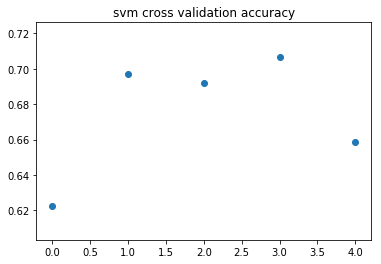

In [93]:
plt.scatter(np.arange(5),score)
plt.title('svm cross validation accuracy')

<p> It looks like our SVM model has a good accuracy of prediction. Since there are a lot of outliers in our raw data like clouds, buildings, neighborhoods, etc... An average of 67.5% accuracy is good</p>

<p> Then we want to study the accuracy of our knn model. We use cross validation to obtain the best k for our knn model</p>

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
cv_scores = []
neighbors = [i for i in range(50,150,10)]
for k in neighbors:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X_train, Y_train, cv=5, scoring='accuracy')
    cv_scores.append(scores.mean())

In [43]:
print(cv_scores)

[0.77951165660291422, 0.77591195605298902, 0.77351215565303888, 0.77071295495323877, 0.76721475435368858, 0.76331510357877597, 0.76231530337882591, 0.76041620292905066, 0.75821580252895071, 0.75671635230408807]


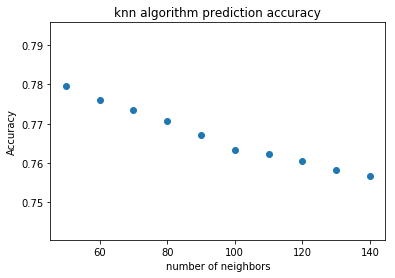

In [44]:
plt.scatter(neighbors, cv_scores)
plt.xlabel('number of neighbors')
plt.ylabel('Accuracy')
plt.title('knn algorithm prediction accuracy')

<p>It seems like our knn algorithm has the best accuracy when k = 50, and the overall accuracy is 10% higher than our svm model. However, there is a serious potential that our knn model might overfit and it might also consider a lot of outliers in the sample. When the number of sample increases, the potential of overfitting decreases, so we pick 100 as our k</p>

<p> When using 50 as our k, I found that it could only recognize soybeans in our southern illinois map. This is a typical behavior of overfitting </p>

In [87]:
knn_model = KNeighborsClassifier(n_neighbors=100)
knn_model.fit(X_train, Y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=100, p=2,
           weights='uniform')

<p> Then we can try larger dataset for knn because it trains really fast </p>

In [78]:
svm_model = svm.SVC(decision_function_shape = 'ovo')
svm_model.fit(X_train, Y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovo', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [12]:
sample = np.random.choice(population,1000000, False)
sample = sorted(sample)
X_train_large = np.take(input_data_flatten, sample, 0)
Y_train_large = np.take(label_flatten, sample)

In [29]:
knn_model2 = KNeighborsClassifier(n_neighbors=1000,weights = 'distance', algorithm = 'ball_tree')
knn_model2.fit(X_train_large, Y_train_large)

KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1000, p=2,
           weights='distance')

<p> Up to now we have built our there models. a knn-small-sample model, a knn-large-sample model, and a svm-small-sample model </p>
<p> The most serious problem of knn is overfitting. Also, it does not have a mathematical calculation of the boundary of different layers. It only uses Euclidean Distance, which is very inaccurate </p>

<p>Then we want to use our model to predict the southern part of Illinois. However, the dataset is too large, it may take several years to output the result.</p>
<p> Observe that there are a lot of large crop fields in Illinois. We can take the average of the color band values of adjacent areas to compress our Image. </p>
<p> However, we don't know how large on average a crop field is. Once we obtain the average size of a corn field, then we can compress our satellite image by that factor </p>
<p> We are going to use Depth First Search algorithm to obtain the average size of field of each crop type </p>

In [267]:
def check_run(input):
    index = 0
    dict = {}
    cur = input[0]
    while index < len(input):
        count = 0
        cur = input[index]
        while index < len(input):
            if input[index] == cur:
                count +=1
                index +=1
            else:
                break
        if cur not in dict:
            dict[cur] = count
        else:
            if count > dict[cur]:
                dict[cur] = count
                

    return dict

def get_neighbors(pos, shape):
    i,j = pos[0] ,pos[1]
    if i == 0 and j == 0:
        return [[1,0], [0,1]]
    if i == shape[0]-1 and j == shape[1] -1:
        return [[i-1,j], [i,j-1]]
    
    if i == 0 and j == shape[1] -1:
        return [[i+1,j], [i, j-1]]
    if i == shape[0] -1 and j == 0:
        return [[i-1, j], [i, j+1]]
    if i == 0:
        return [[i+1,j], [i, j+1], [i, j-1]]
    if i == shape[0] -1:
        return [[i,j], [i, j+1], [i-1, j]]
    if j == 0:
        return [[i, j+1], [i+1, j], [i-1,j]]
    if j == shape[1] -1:
        return [[i, j-1], [i-1, j], [i+1, j]]
    return [[i+1, j], [i-1, j], [i, j+1], [i, j-1]]



def DFS(matrix, pos, visited):
    i,j = pos[0],pos[1]
    count = 1
    stack = []
    stack.append((i,j))
    visited[i,j] = 1
    
    while stack != []:
        cur_position = stack.pop()
        i,j = cur_position[0], cur_position[1]
        for k in get_neighbors((i,j), matrix.shape):
            if visited[k[0], k[1]] != 1 and matrix[k[0], k[1]] == matrix[i,j]:
                stack.append(k)
                visited[k[0], k[1]] = 1
                count += 1
    return count


In [287]:
visited = np.array([[0]*5000]*5000)
dict_count_areas = {}
dict_total_areas = {}
for i in range(5000):
    for j in range(5000):
        if visited[i,j] == 0:
            count = DFS(label_array[:5000,:5000], [i,j], visited)
            if label_array[i,j] not in dict_count_areas:
                dict_count_areas[label_array[i,j]] = 1
            else:
                dict_count_areas[label_array[i,j]] += 1
            
            if label_array[i,j] not in dict_total_areas:
                dict_total_areas[label_array[i,j]] = count
            else:
                dict_total_areas[label_array[i,j]] += count

print(dict_count_areas)
print(dict_total_areas)

{1: 2451, 131: 99, 4: 1, 5: 1583, 141: 526, 13: 2, 152: 7, 195: 2, 24: 360, 26: 39, 28: 33, 58: 4, 222: 3, 59: 5, 36: 174, 37: 208, 43: 13, 111: 182, 176: 2899, 241: 1, 254: 1, 121: 5300, 122: 2829, 123: 738, 124: 118, 61: 12, 190: 400}
{1: 11469596, 131: 9311, 4: 42, 5: 9266367, 141: 678453, 13: 91, 152: 491, 195: 98, 24: 142908, 26: 2649, 28: 2994, 58: 394, 222: 189, 59: 280, 36: 49169, 37: 22128, 43: 862, 111: 67975, 176: 1289984, 241: 49, 254: 28, 121: 967228, 122: 833936, 123: 103647, 124: 25390, 61: 660, 190: 65081}


In [288]:
average_areas = {}
for i in dict_average_areas:
    average_areas[i] = dict_total_areas[i]/dict_count_areas[i]
    
print(average_areas)

{1: 4679.557731538148, 131: 94.05050505050505, 36: 282.58045977011494, 5: 5853.674668351232, 124: 215.16949152542372, 141: 1289.8346007604562, 176: 444.9755087961366, 24: 396.96666666666664, 121: 182.49584905660376, 122: 294.78119476846945, 123: 140.4430894308943, 28: 90.72727272727273}


<p>It seems like corn fields on average occupies 4680 pixels, which is 117000m2 on the map. Soy bean fields occupy 5853 pixels, which is 146325m2 on the map. Then we choose our factor to be 400 pixels, which is about 1/12 of the average size of corn fields to prune our image. Our prediction accuracy will not suffer a lot from this pruning</p>

<p> The tricky part is that we can divide the whole satellite image into grids, and pick one pixel for each grid. Since the average size of corn fields and soy bean fields is large. If a cornfield exists, if its size is 12 grids, it must be picked by at least 9 grids. The worst ratio for an average cornfield is 0.75, which means that our prediction will at least covers 75% of the area of a cornfield. 
This ratio is even better for soybeans. So, there is a possibility that we predict more soybeans than actual. </p>

In [16]:
#start predicting

tif3 = gdal.Open('20130824_RE3_3A_Analytic_Champaign_south.tif')
band_1 = (tif3.GetRasterBand(1)).ReadAsArray()
band_2 = (tif3.GetRasterBand(2)).ReadAsArray()
band_3 = (tif3.GetRasterBand(3)).ReadAsArray()
band_4 = (tif3.GetRasterBand(4)).ReadAsArray()
band_5 = (tif3.GetRasterBand(5)).ReadAsArray()

In [17]:
band_1 = band_1/np.max(band_1)
band_2 = band_2/np.max(band_2)
band_3 = band_3/np.max(band_3)
band_4 = band_4/np.max(band_4)
band_5 = band_5/np.max(band_5)


In [18]:
#constructing grids

print(5959//20, 9425//20)
compressed_data = np.zeros((5959//20,9425//20,5))
for i in range(5959//20):
    for j in range(9425//20):
        compressed_data[i,j,0] = band_1[20*i, 20*j]
        compressed_data[i,j,1] = band_2[20*i, 20*j]
        compressed_data[i,j,2] = band_3[20*i, 20*j]
        compressed_data[i,j,3] = band_4[20*i, 20*j]
        compressed_data[i,j,4] = band_5[20*i, 20*j]
            

297 471


In [338]:
flatten1 = band_1.flatten()
flatten2 = band_2.flatten()
flatten3 = band_3.flatten()
flatten4 = band_4.flatten()
flatten5 = band_5.flatten()

In [19]:
#reshape data to fit in our model
compressed_data_flatten = compressed_data.reshape(((5959//20)*(9425//20)),5)

In [49]:
#first we use knn to predict
prediction_south = knn_model.predict(compressed_data_flatten)

(array([ 10267.,      0.,      0.,      0.,      0.,  37357.,      0.,
             0.,      0.,  92263.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

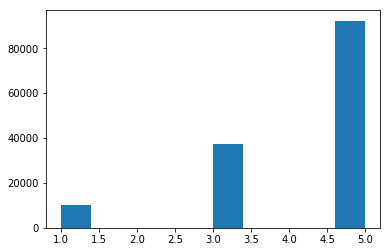

In [99]:
plt.hist(prediction_south)

<p>The histogram shows that We have a lot of soybeans in southern illinois, the number of soybeans is 9 times the number of corns. We have mentioned that knn has several problems before.
Also, our cross validation only shows 75% accuracy. This is still reasonable</p>

In [79]:
prediction_south2 = svm_model.predict(compressed_data_flatten)

In [80]:
unique2,count2 = np.unique(prediction_south2, return_counts = True)
count2

array([69957, 12421, 57509])

(array([ 69957.,      0.,      0.,      0.,      0.,  12421.,      0.,
             0.,      0.,  57509.]),
 array([ 1. ,  1.4,  1.8,  2.2,  2.6,  3. ,  3.4,  3.8,  4.2,  4.6,  5. ]),
 <a list of 10 Patch objects>)

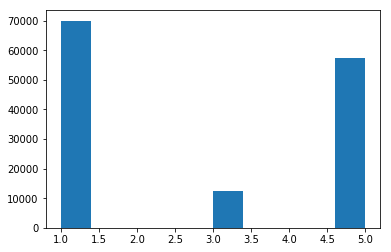

In [81]:
plt.hist(prediction_south2)

<p>svm model seems to have a good gauge of the different crop types in southern illinois. It agrees with our common sense </p>
<p> Our large sample knn fails. It only output one type of crop. The reason might be that it overfits in large sample </p>

<p> Then we plot our two predictions in yellow (for corn), green (for soybeans) and black (for others) </p>

In [94]:
prediction2 = prediction_south2.reshape((5959//20),(9425//20))
prediction = prediction_south.reshape((5959//20),(9425//20))

In [83]:
from PIL import Image
dict = {1: [0.0,255.0,255.0],5: [0.0,255.0,0.0],3: [0.0,0.0,0.0]}

In [95]:
img = np.zeros((5929,9425,3))
img2 = np.zeros((5929,9425,3))

In [85]:
for i in range(5959//20):
    for j in range(9425//20):
        if 20*i+20 < 5928 and 20*j+20 < 9424:
            img[20*i:20*i+20, 20*j:20*j+20] = dict[prediction2[i,j]]
        else:
            img[20*i:,20*j:] = dict[prediction2[i,j]]

In [86]:
import cv2
cv2.imwrite('prediction_svm_rbf.png', img)

True

In [96]:
for i in range(5959//20):
    for j in range(9425//20):
        if 20*i+20 < 5928 and 20*j+20 < 9424:
            img2[20*i:20*i+20, 20*j:20*j+20] = dict[prediction[i,j]]
        else:
            img2[20*i:,20*j:] = dict[prediction[i,j]]

In [97]:
cv2.imwrite('prediction_knn_100.png', img2)

True